In [1]:
from tqdm import tqdm 
from xml.etree import ElementTree as ET
from datetime import datetime
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def nctid2path(id):
    part = id[:7] + 'xxxx'
    name = id + '.xml'
    return f'../../raw_data/{part}/{name}'

In [ ]:
All_data = []
for i in range(10):
    All_data.append(pd.read_csv(f'../../preprocess_data/All_data_part{i}.csv', index_col=0, low_memory=False))
    # print(len(All_data[i].columns))
    
All = pd.concat(All_data)
All

In [2]:
raw_data = pd.read_csv('raw_data.csv', index_col=0)
raw_data

,status,why_stop,label,phase,diseases,icdcodes,drugs,smiless,criteria,complete_year,start_year
nctid,,,,,,,,,,,
NCT00000102,completed,NaN,-1,phase 1/phase 2,['congenital adrenal hyperplasia'],"[""['N25.0', 'Q61.4', 'N23', 'N26.9', 'P96.0', ...",['nifedipine'],['COC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC=C1[N+]([O-]...,\n Inclusion Criteria:\r\n\r\n ...,NaN,NaN
NCT00000110,completed,NaN,-1,NaN,['obesity'],"[""['E66.8', 'E66.9', 'E66.1', 'O99.214', 'O99....",['dietary fat'],[],\n Inclusion Criteria:\r\n\r\n ...,NaN,NaN
NCT00000114,completed,NaN,-1,phase 3,['retinitis pigmentosa'],[],"['vitamin e', 'vitamin a']",['CC(C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@]1(C)CCC2...,\n Men and nonpregnant women between ag...,1987.0,1984.0
NCT00000115,completed,NaN,-1,phase 2,"['macular edema, cystoid']",[],['acetazolamide'],['CC(=O)NC1=NN=C(S1)S(N)(=O)=O'],\n Males and females 8 years of age or ...,1994.0,1990.0
NCT00000117,completed,NaN,-1,phase 3,['optic neuritis'],"[""['H46.8', 'H46.9']""]",['immunoglobulin'],[],"\n To be eligible, patients must have a...",1997.0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...
NCT06263959,recruiting,NaN,-1,phase 2,['chronic hepatitis b'],"[""['B18.0', 'B18.1', 'B18.2', 'B18.8', 'B18.9']""]","['gst-hg131', 'placebo to match gst-hg131']",[],\n Inclusion Criteria:\r\n\r\n ...,2024.0,2023.0
NCT06263998,not yet recruiting,NaN,-1,phase 1,['xerophthalmia'],[],"['ncp112', 'ncp112 placebo']",[],\n Inclusion Criteria:\r\n\r\n ...,2025.0,2024.0
NCT06264141,recruiting,NaN,-1,phase 2,['recurrent acute rhinosinusitis'],[],['nitric oxide releasing solution'],[],\n Inclusion Criteria:\r\n\r\n ...,2024.0,2024.0


## description-summary

In [3]:
description_summary = All[['detailed_description/textblock', 'brief_summary/textblock']].dropna()
description_summary.rename(columns={'detailed_description/textblock': 'detailed_description', 'brief_summary/textblock': 'brief_summary'}, inplace=True)
description_summary

,detailed_description,brief_summary
NCT00000102,\n This protocol is designed to assess bo...,\n This study will test the ability of ex...
NCT00000105,\n Patients will receive each vaccine onc...,\n The purpose of this study is to learn ...
NCT00000113,\n Myopia (nearsightedness) is an importa...,\n To evaluate whether progressive additi...
NCT00000114,\n Retinitis pigmentosa (RP) is a group o...,\n To determine whether supplements of vi...
NCT00000115,"\n Uveitis, an intraocular inflammatory d...",\n To test the efficacy of acetazolamide ...
...,...,...
NCT06264258,\n Youth with T1D who comply with inclusi...,\n The goal of this study is to evaluate ...
NCT06264271,\n Education on carbohydrate counting and...,\n The study aims to elucidate whether pa...
NCT06264310,"\n This is a Phase 2, Double-Blind, Place...",\n This Study Aims to Evaluate the Safety...
NCT06264323,\n QUALITY ASSURANCE PLAN:\r\n\r\n M...,\n A prospective cohort study with 9 mont...


In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(description_summary, test_size=0.1, random_state=99)
print(f'Train Set: {len(train_set)} Test Set: {len(test_set)}')
train_set.to_csv('description-summary/train.csv')
test_set.to_csv('description-summary/test.csv')

Train Set: 293645 Test Set: 32628


## Adervse Event Rate prediction

In [10]:
def xmlfile2adverseevent(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    try:
        serious_event = root.findall('clinical_results/reported_events/serious_events/category_list/category')#/measure/analyzed_list/analyzed/count_list')
        for title in serious_event:
            if title.find('title').text == 'Total':
                event = title.findall('event_list/event')
                for e in event:
                    if 'serious' in e.find('sub_title').text and 'Total' in e.find('sub_title').text:
                        count = e.findall('counts')
                        serious_adverse_affected = 0
                        serious_adverse_atrisk = 0
                        for group in count:
                            serious_adverse_affected += eval(group.attrib['subjects_affected'])
                            serious_adverse_atrisk += eval(group.attrib['subjects_at_risk'])

                    elif 'mortality' in e.find('sub_title').text and 'Total' in e.find('sub_title').text:
                        count = e.findall('counts')
                        mortality_affected = 0
                        mortality_atrisk = 0
                        for group in count:
                            mortality_affected += eval(group.attrib['subjects_affected'])
                            mortality_atrisk += eval(group.attrib['subjects_at_risk'])
        return serious_adverse_affected, serious_adverse_atrisk, mortality_affected, mortality_atrisk, serious_adverse_affected / serious_adverse_atrisk, mortality_affected / mortality_atrisk
    
    except:
        return None, None, None, None, None, None

xml_file = "../../raw_data/NCT0356xxxx/NCT03569748.xml"
result = xmlfile2adverseevent(xml_file)
print(result)


(0, 220, 0, 220, 0.0, 0.0)


In [12]:
adverse_list = []

# 480403 lines
with open("../../data/all_xml", "r") as file:
    for xml_path in tqdm(file):
        xml_path = f"../../{xml_path.strip()}"
        
        # NCT00000150 <- raw_data/NCT0000xxxx/NCT00000150.xml
        nct_id = re.search(r"/([^/]+)\.xml$", xml_path).group(1)
        
        adverse_affected, adverse_risk, mortality_affected, mortality_risk, adverse_event_rate, mortality_rate = xmlfile2adverseevent(xml_path)
        if adverse_affected is not None:
            adverse_list.append((nct_id, adverse_affected, adverse_risk, mortality_affected, mortality_risk, adverse_event_rate, mortality_rate))    

adverse_df = pd.DataFrame(adverse_list, columns=['ntcid', 'serious_adverse_affected', 'serious_adverse_atrisk', 'mortality_affected', 'mortality_atrisk', 'serious_adverse_rate', 'mortality_rate'])
adverse_df = adverse_df.set_index('ntcid')
print(adverse_df)
adverse_df.to_csv('adverse-event-rate-prediction/output.csv')

0it [00:00, ?it/s]

57199it [02:03, 34.70it/s] 

## Participants dropout rate Forecasting

In [3]:
# 提取
def xmlfile2participantflow(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    try:
        participant_flow = root.findall('clinical_results/participant_flow/period_list/period/milestone_list/milestone')#/measure/analyzed_list/analyzed/count_list')
        for child in participant_flow:
            
            if child.find('title').text == 'STARTED':
                started = 0
                for perid in child.findall('participants_list/participants'):
                    started += eval(perid.attrib['count'])
            elif child.find('title').text == 'COMPLETED':
                completed = 0
                for perid in child.findall('participants_list/participants'):
                    completed += eval(perid.attrib['count'])
            elif child.find('title').text == 'NOT COMPLETED':
                not_completed = 0
                for perid in child.findall('participants_list/participants'):
                    not_completed += eval(perid.attrib['count'])

        not_complete_percent = not_completed / started    
    except:
        started, completed, not_completed, not_complete_percent = -1, -1, -1, -1
    
    return started, completed, not_completed, not_complete_percent

flow_list = []

# 480403 lines
with open("../../data/all_xml", "r") as file:
    for xml_path in tqdm(file):
        xml_path = f"../../{xml_path.strip()}"
        
        # NCT00000150 <- raw_data/NCT0000xxxx/NCT00000150.xml
        nct_id = re.search(r"/([^/]+)\.xml$", xml_path).group(1)
        
        started, completed, not_completed, not_complete_percent = xmlfile2participantflow(xml_path)
        if started != -1:
            # print(started, completed, not_completed, complete_percent)
            flow_list.append((nct_id, started, completed, not_completed, not_complete_percent))    

participantsflow_df = pd.DataFrame(flow_list, columns=['ntcid', 'started', 'completed', 'not_completed', 'droupout_rate'])
participantsflow_df = participantsflow_df.set_index('ntcid')
print(participantsflow_df)

483239it [15:52, 507.14it/s] 


             started  completed  not_completed  droupout_rate
ntcid                                                        
NCT00000125     1636       1159            477       0.291565
NCT00000134      279        279              0       0.000000
NCT00000135      209        168             41       0.196172
NCT00000136      234        234              0       0.000000
NCT00000142       64         64              0       0.000000
...              ...        ...            ...            ...
NCT06002347       23         20              3       0.130435
NCT06033079      536        536              0       0.000000
NCT06076681       40         40              0       0.000000
NCT06076694       80         77              3       0.037500
NCT06097676       51         48              3       0.058824

[62058 rows x 4 columns]


In [4]:
participantsflow_df.to_csv('participant-flow-prediction/output.csv')

<Axes: ylabel='droupout_rate'>

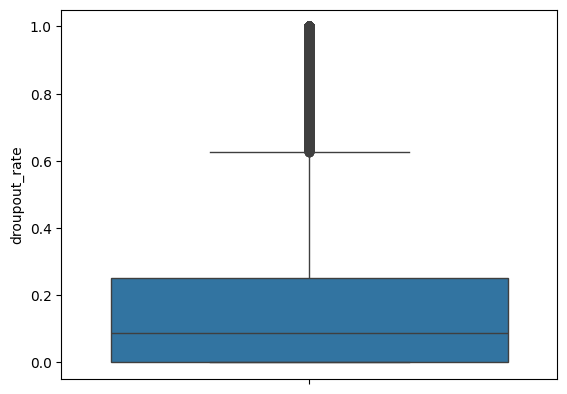

In [5]:
sns.boxplot(data = participantsflow_df, y='droupout_rate')

## Trial Duration Prediction

In [8]:
def parse_date(date_str):
    try:
        output = datetime.strptime(date_str, "%B %d, %Y")
    except:
        try:
            output = datetime.strptime(date_str, "%B %Y")
        except Exception as e:
            print(e)
            raise e
    return output

def calculate_duration(start_date, completion_date):
    # Unit: days
    if start_date and completion_date:
        start_date = parse_date(start_date)
        completion_date = parse_date(completion_date)
        duration = (completion_date - start_date).days
    else:
        duration = -1

    return duration

def xmlfile2date(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    try:
        start_date = root.find('start_date').text
    except:
        start_date = ''
    try:
        completion_date = root.find('primary_completion_date').text
        type = root.find('primary_completion_date').attrib['type']
    except:
        try:
            completion_date = root.find('completion_date').text 
            type = (root.find('completion_date').attrib['type'] == "Actual")
        except:
            completion_date = ''
            type = False

    return start_date, completion_date, type


In [5]:
date_list = []

# 480403 lines
with open("../../data/all_xml", "r") as file:
    for xml_path in tqdm(file):
        xml_path = f"../../{xml_path.strip()}"
        
        # NCT00000150 <- raw_data/NCT0000xxxx/NCT00000150.xml
        nct_id = re.search(r"/([^/]+)\.xml$", xml_path).group(1)
        
        start_date, completion_date, type = xmlfile2date(xml_path)

        if type:
            if start_date and completion_date:
                duration = calculate_duration(start_date, completion_date)
            else:
                duration = -1
        
            date_list.append((nct_id, start_date, completion_date, duration))


483239it [14:42, 547.79it/s] 


In [6]:
# 483239  lines
date_df = pd.DataFrame(date_list, columns=['ntcid', 'start_date', 'completion_date', 'time_day'])
date_df = date_df.set_index('ntcid')
print(date_df)

# date_df.to_csv('data/ntcid_time_all.csv', index=False, sep='\t')

                    start_date    completion_date  time_day
ntcid                                                      
NCT00000105          July 2002         March 2012      3531
NCT00000113     September 1997       October 2001      1491
NCT00000114           May 1984          June 1987      1126
NCT00000115      December 1990          June 1994      1278
NCT00000116           May 1996     September 2002      2314
...                        ...                ...       ...
NCT06264297  February 20, 2023       January 2027      1411
NCT06264310         March 2024       January 2025       306
NCT06264323  September 1, 2017       May 30, 2018       271
NCT06264336      March 1, 2024  December 31, 2024       305
NCT06264349     March 15, 2024       May 15, 2025       426

[468178 rows x 3 columns]


In [7]:
# Filter out unusable time data.
# 469937 lines
date_df = date_df[date_df['time_day'] > 0]
date_df
# date_df.to_csv('trial-duration-prediction/ntcid_duration_time.csv', index=False, sep='\t')

,start_date,completion_date,time_day
ntcid,,,
NCT00000105,July 2002,March 2012,3531
NCT00000113,September 1997,October 2001,1491
NCT00000114,May 1984,June 1987,1126
NCT00000115,December 1990,June 1994,1278
NCT00000116,May 1996,September 2002,2314
...,...,...,...
NCT06264297,"February 20, 2023",January 2027,1411
NCT06264310,March 2024,January 2025,306
NCT06264323,"September 1, 2017","May 30, 2018",271


In [8]:
# Analysis
medium_time_day = date_df['time_day'].median()
average_time_day = date_df['time_day'].mean()
minimum_time_day = date_df['time_day'].min()
maximum_time_day = date_df['time_day'].max()
std_time_day = date_df['time_day'].std()

print("Medium time_day:", medium_time_day)
print("Average time_day:", average_time_day)
print("Minimum time_day:", minimum_time_day)
print("Maximum time_day:", maximum_time_day)
print("Standard Deviation of time_day:", std_time_day)


Medium time_day: 669.0
Average time_day: 932.4504312487841
Minimum time_day: 1
Maximum time_day: 42217
Standard Deviation of time_day: 1082.6610761928803


In [9]:
date_df['month'] = date_df['time_day'] // 30
frequency_month = date_df['month'].value_counts().sort_index().reset_index()
print(frequency_month)

     month  count
0        0   4720
1        1  10905
2        2  11684
3        3  12078
4        4  11331
..     ...    ...
560   1252      2
561   1266      1
562   1270      1
563   1339      1
564   1407      1

[565 rows x 2 columns]


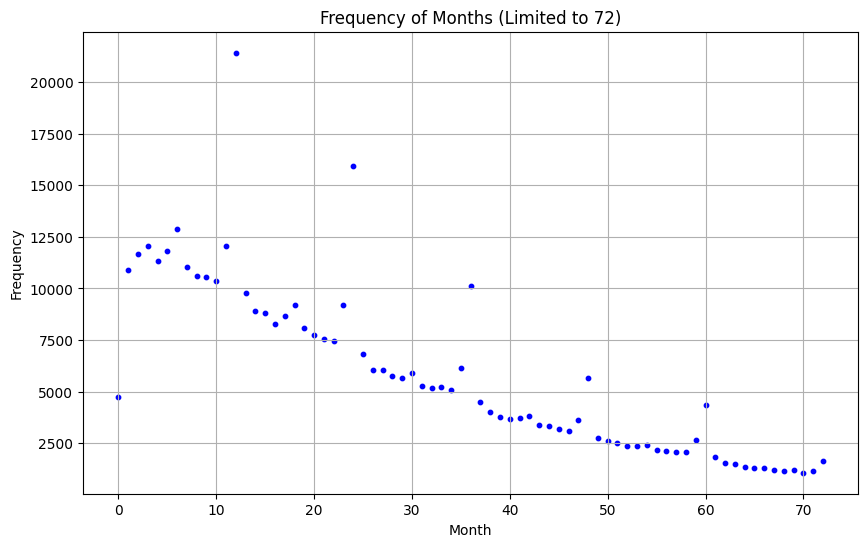

In [10]:
plot_data = frequency_month[frequency_month['month'] <= 72]

plt.figure(figsize=(10, 6))

plt.scatter(plot_data['month'], plot_data['count'], s=10, c='blue')

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Months (Limited to 72)')
plt.grid(True)  # Add grid

plt.show()

In [10]:
duration_prediction_input = raw_data[['icdcodes', 'drugs', 'criteria']]
duration_prediction_input

,icdcodes,drugs,criteria
nctid,,,
NCT00000102,"[""['N25.0', 'Q61.4', 'N23', 'N26.9', 'P96.0', ...",['nifedipine'],\n Inclusion Criteria:\r\n\r\n ...
NCT00000110,"[""['E66.8', 'E66.9', 'E66.1', 'O99.214', 'O99....",['dietary fat'],\n Inclusion Criteria:\r\n\r\n ...
NCT00000114,[],"['vitamin e', 'vitamin a']",\n Men and nonpregnant women between ag...
NCT00000115,[],['acetazolamide'],\n Males and females 8 years of age or ...
NCT00000117,"[""['H46.8', 'H46.9']""]",['immunoglobulin'],"\n To be eligible, patients must have a..."
...,...,...,...
NCT06263959,"[""['B18.0', 'B18.1', 'B18.2', 'B18.8', 'B18.9']""]","['gst-hg131', 'placebo to match gst-hg131']",\n Inclusion Criteria:\r\n\r\n ...
NCT06263998,[],"['ncp112', 'ncp112 placebo']",\n Inclusion Criteria:\r\n\r\n ...
NCT06264141,[],['nitric oxide releasing solution'],\n Inclusion Criteria:\r\n\r\n ...


In [11]:
duration_prediction_input.isna().sum()

icdcodes     0
drugs        0
criteria    28
dtype: int64

In [12]:
# 取交集
cross_index = list(set(duration_prediction_input.index.to_list()).intersection(set(date_df.index.to_list())))
len(cross_index)

166587

In [13]:
cross_index

['NCT01887340',
 'NCT00449449',
 'NCT00852670',
 'NCT04326283',
 'NCT05910983',
 'NCT02849743',
 'NCT02647268',
 'NCT02671552',
 'NCT01912534',
 'NCT03284853',
 'NCT01957176',
 'NCT03474198',
 'NCT02728050',
 'NCT00810667',
 'NCT02133482',
 'NCT05738759',
 'NCT01399580',
 'NCT06028828',
 'NCT04372628',
 'NCT02213029',
 'NCT00461786',
 'NCT00777933',
 'NCT00116025',
 'NCT01672333',
 'NCT01024075',
 'NCT01881217',
 'NCT04317703',
 'NCT03335852',
 'NCT00452803',
 'NCT03343080',
 'NCT00181558',
 'NCT00592488',
 'NCT00781443',
 'NCT03031262',
 'NCT05588609',
 'NCT02570997',
 'NCT00038701',
 'NCT01314898',
 'NCT00599196',
 'NCT01633359',
 'NCT02344511',
 'NCT02620683',
 'NCT00139880',
 'NCT00246441',
 'NCT00523211',
 'NCT00665626',
 'NCT05330078',
 'NCT01393340',
 'NCT04328844',
 'NCT00685529',
 'NCT00972283',
 'NCT01963663',
 'NCT02373280',
 'NCT06145321',
 'NCT02479204',
 'NCT02357225',
 'NCT03629600',
 'NCT01762670',
 'NCT03403517',
 'NCT02485106',
 'NCT03420079',
 'NCT01235546',
 'NCT062

In [14]:
duration_prediction_output = date_df.loc[cross_index]
duration_prediction_output

,start_date,completion_date,time_day,month
ntcid,,,,
NCT01887340,June 2013,June 2016,1096,36
NCT00449449,September 2003,September 2006,1096,36
NCT00852670,October 2008,July 2009,273,9
NCT04326283,"April 2, 2020","April 28, 2023",1121,37
NCT05910983,"December 1, 2023","May 1, 2024",152,5
...,...,...,...,...
NCT00604019,March 2003,August 2009,2345,78
NCT02782481,August 2016,"October 15, 2018",805,26
NCT02384889,April 2015,"October 7, 2019",1650,55


In [15]:
duration_prediction_input = duration_prediction_input.loc[cross_index]
duration_prediction_input

,icdcodes,drugs,criteria
nctid,,,
NCT01887340,[],"['carboplatin', 'etoposide', 'cisplatin']",\n Inclusion Criteria shared:\r\n\r\n ...
NCT00449449,"[""['N46.8', 'N46.9', 'N97.9', 'N97.0', 'N97.1'...",['pertubation with lidocain solution'],\n Inclusion Criteria:\r\n\r\n ...
NCT00852670,"[""['L40.0', 'L40.4', 'L40.8', 'L40.9', 'L40.1'...","['act-128800', 'placebo']",\n Inclusion Criteria:\r\n\r\n ...
NCT04326283,"[""['G12.21']""]","['trametinib (0.5 mg)', 'trametinib (1 mg)', '...",\n Main inclusion criteria:\r\n\r\n ...
NCT05910983,"[""['N32.81']""]",['intravesical botox injection'],\n Inclusion Criteria:\r\n\r\n ...
...,...,...,...
NCT00604019,"[""['T81.12XS', 'R65.20', 'R65.21', 'T81.12XA',...","['dopamine', 'norepinephrine']",\n Inclusion Criteria:\r\n\r\n ...
NCT02782481,"[""['G20.A2', 'G20.B2', 'G20.A1', 'G20.B1']""]","['nd0612', 'placebo']",\n Key Inclusion Criteria:\r\n\r\n ...
NCT02384889,"[""['E10.65', 'E10.9', 'E10.21', 'E10.36', 'E10...","['difluoromethylornithine', 'placebo']",\n Inclusion Criteria:\r\n\r\n ...


In [12]:
# duration_prediction_input.to_csv(f'trial-duration-prediction/input.csv')
date_df.set_index('ntcid')
date_df.to_csv(f'trial-duration-prediction/output.csv')

## drug repurpose

In [18]:
start, complete = [], []
for i in tqdm(raw_data.index):
    xml_file = nctid2path(i)
    # print(xml_file)
    start_date, completion_date, type = xmlfile2date(xml_file)
    # print(start_date, completion_date)
    if start_date != '':
        start_date = parse_date(start_date).year
        # print(start_date.year)
    else:
        start_date = None
    if completion_date != '':
        completion_date = parse_date(completion_date).year
        # print(completion_date.year)
    else:
        completion_date = None
    start.append(start_date)
    complete.append(completion_date)
    # print(start_date, completion_date)

    

100%|██████████| 171992/171992 [15:41<00:00, 182.61it/s]


In [20]:
raw_data['complete_year'] = complete
raw_data['start_year'] = start
raw_data.to_csv('raw_data.csv')

In [21]:
year = 2019
test_part = raw_data[['diseases','icdcodes','drugs','smiless']][raw_data['complete_year'].apply(lambda x: year >= x if x is not None else False)]
train_part = raw_data[['diseases','icdcodes','drugs','smiless']][raw_data['complete_year'].apply(lambda x: year < x if x is not None else False)]
print(f'Train Set: {len(train_part.dropna())} Test Set: {len(test_part.dropna())}')

Train Set: 62043 Test Set: 104049


In [22]:
train_drug_dict = {}
train_drug_disease = {}
for i in tqdm(train_part.index):
    drugs = train_part.loc[i, 'drugs']
    drugs = drugs if isinstance(drugs, list) else eval(drugs)
    diseases = train_part.loc[i, 'diseases']
    diseases = diseases if isinstance(diseases, list) else eval(diseases)
    if isinstance(drugs, list):
        for drug in drugs:
            if drug in train_drug_dict:
                train_drug_dict[drug] += 1
                if isinstance(train_drug_disease[drug], list):
                    if isinstance(diseases, list):
                        train_drug_disease[drug].extend(diseases)
                    else:
                        train_drug_disease[drug].append(diseases)
                else:
                    train_drug_disease[drug] = diseases if isinstance(diseases, list) else [diseases]
            else:
                train_drug_dict[drug] = 1
                train_drug_disease[drug] = diseases if isinstance(diseases, list) else [diseases]
            train_drug_disease[drug] = list(set(train_drug_disease[drug]))
    else:
        print(drugs)

100%|██████████| 62043/62043 [00:04<00:00, 14692.67it/s]


In [19]:
train_drug_twice = []
total_pair = 0
for k, v in train_drug_dict.items():
    if v >= 2:
        train_drug_twice.append(k)
    total_pair += len(train_drug_disease[k])
print(f"Train total pair: {total_pair}")

Train total pair: 206724


In [10]:
test_drug_dict = {}
test_drug_disease = {}
for i in tqdm(test_part.index):
    drugs = test_part.loc[i, 'drugs']
    drugs = drugs if isinstance(drugs, list) else eval(drugs)
    diseases = test_part.loc[i, 'diseases']
    diseases = diseases if isinstance(diseases, list) else eval(diseases)
    # print(diseases)
    if isinstance(drugs, list):
        for drug in drugs:
            if drug in test_drug_dict:
                test_drug_dict[drug] += 1
                if isinstance(test_drug_disease[drug], list):
                    if isinstance(diseases, list):
                        test_drug_disease[drug].extend(diseases)
                    else:
                        test_drug_disease[drug].append(diseases)
                else:
                    test_drug_disease[drug] =  diseases if isinstance(diseases, list) else [diseases]
            else:
                test_drug_dict[drug] = 1
                test_drug_disease[drug] = diseases if isinstance(diseases, list) else [diseases]

            test_drug_disease[drug] = list(set(test_drug_disease[drug]))
    else:
        print(drugs)

  0%|          | 0/95628 [00:00<?, ?it/s]

100%|██████████| 95628/95628 [00:05<00:00, 16033.98it/s]


In [20]:
drop_k = []
save_k = []
total_pair = 0
for k, v in test_drug_dict.items():
    if k in train_drug_dict.keys():
        save_k.append(k)
        total_pair += len(test_drug_disease[k])
    else:
        drop_k.append(k)

print(f"Test total pair: {total_pair}")

Test total pair: 99289


## Trial Approval Prediction

trail approval 是否是status？

In [17]:
approval_input = raw_data[['icdcodes', 'drugs', 'criteria']]
approval_output = raw_data[['status']]

In [13]:
def str2binary(value):
    if value == 'Completed':
        return 1
    elif value == 'Terminated':
        return 0
    else:
        return -1
    
# approval_output['label'] = approval_output['status'].apply(str2binary)

In [14]:
def xml2approval(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    try:
        status = root.find('overall_status').text
    except:
        status = ''
    return status

In [15]:
approval_output = []

with open('../../data/all_xml', 'r') as file:
    for xml_path in tqdm(file):
        xml_path = f'../../{xml_path.strip()}'
        nct_id = re.search(r'/([^/]+)\.xml$', xml_path).group(1)
        status = xml2approval(xml_path)
        if str2binary(status) != -1:
            approval_output.append((nct_id, status, str2binary(status)))
        
approval_output_df = pd.DataFrame(approval_output, columns=['ntcid', 'status', 'label']).set_index('ntcid')

483239it [16:24, 490.71it/s] 


In [16]:
approval_output_df['label'].value_counts()

label
1    263381
0     28014
Name: count, dtype: int64

In [17]:
# approval_input.to_csv('trial-approval-prediction/input.csv')
approval_output_df.to_csv('trial-approval-prediction/output.csv')

## Trial Failure Reason Prediction

选择 why_stopped? 还是只筛出trial_outcom_v1.csv的

In [20]:
failure_input = raw_data[['icdcodes', 'drugs', 'criteria']][raw_data['status']!='completed']
failure_output = raw_data['why_stop'][raw_data['status']!='completed']

In [21]:
raw_data['why_stop'].value_counts()

why_stop
\n    slow accrual\r\n                                                                                                                                         294
\n    sponsor decision\r\n                                                                                                                                     236
\n    low accrual\r\n                                                                                                                                          202
\n    lack of funding\r\n                                                                                                                                      178
\n    lack of enrollment\r\n                                                                                                                                   114
                                                                                                                                                              ... 
\n    b330100

In [22]:
trial_outcome_v1 = pd.read_csv('data/IQVIA/trial_outcomes_v1.csv', index_col=0)
trial_outcome_v1

,trialOutcome
studyid,
NCT00000102,"Completed, Outcome unknown"
NCT00000105,"Terminated, Other"
NCT00000172,"Completed, Positive outcome/primary endpoint(s..."
NCT00000173,"Completed, Positive outcome/primary endpoint(s..."
NCT00000174,"Completed, Negative outcome/primary endpoint(s..."
...,...
NCT03733301,"Completed, Positive outcome/primary endpoint(s..."
NCT03733574,"Completed, Outcome unknown"
NCT03735446,"Terminated, Business decision - Other"


In [23]:
trial_outcome_v1['trialOutcome'].value_counts()

trialOutcome
Completed, Positive outcome/primary endpoint(s) met          16067
Completed, Outcome unknown                                    9162
Completed, Outcome indeterminate                              4478
Terminated, Poor enrollment                                   4088
Completed, Negative outcome/primary endpoint(s) not met       3767
Terminated, Unknown                                           3103
Terminated, Planned but never initiated                       2562
Terminated, Other                                             2000
Terminated, Lack of efficacy                                  1682
Terminated, Business decision - Other                         1448
Terminated, Safety/adverse effects                             921
Terminated, Lack of funding                                    752
Terminated, Business decision - Pipeline reprioritization      691
Terminated, Business decision - Drug strategy shift            315
Completed, Early positive outcome                

In [24]:
# 选择trial outcome v1 里的 Completed, Positive outcome/primary endpoint(s) met / Completed, Outcome unknown / Completed, Outcome indeterminate / 
#                         Completed, Early positive outcome 除去 
# Completed, Negative outcome/primary endpoint(s) not met 保留
## completed 里的 p-n
def Choose_completed(value):
    delete = ['Completed, Positive outcome/primary endpoint(s) met', 'Completed, Outcome unknown', ' Completed, Outcome indeterminate', 'Completed, Early positive outcome']
    if value in delete:
        return False
    else:
        return True
failure_output = trial_outcome_v1[trial_outcome_v1['trialOutcome'].apply(Choose_completed)]
failure_output['trialOutcome'].value_counts()

trialOutcome
Completed, Outcome indeterminate                             4478
Terminated, Poor enrollment                                  4088
Completed, Negative outcome/primary endpoint(s) not met      3767
Terminated, Unknown                                          3103
Terminated, Planned but never initiated                      2562
Terminated, Other                                            2000
Terminated, Lack of efficacy                                 1682
Terminated, Business decision - Other                        1448
Terminated, Safety/adverse effects                            921
Terminated, Lack of funding                                   752
Terminated, Business decision - Pipeline reprioritization     691
Terminated, Business decision - Drug strategy shift           315
Name: count, dtype: int64

In [25]:
failure_output['label'] = failure_output['trialOutcome'].astype('category').cat.codes
failure_output['label'].value_counts()

/tmp/ipykernel_14127/3494840454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_output['label'] = failure_output['trialOutcome'].astype('category').cat.codes


label
1     4478
9     4088
0     3767
11    3103
8     2562
7     2000
5     1682
3     1448
10     921
6      752
4      691
2      315
Name: count, dtype: int64

In [26]:
# 取交集
cross_index = list(set(failure_output.index.to_list()).intersection((failure_input.index.to_list())))
len(cross_index)

10820

In [27]:
failure_input = failure_input.loc[cross_index]
failure_input.to_csv('trial-failure-reason-prediction/input.csv')
failure_output = failure_output.loc[cross_index]
failure_output.to_csv('trial-failure-reason-prediction/output.csv')

## Patient-Trial Matching

没有找到patient单独的信息，只有一些分组后group的信息

## Eligibility Criteria Design

trial summary/objective 选择 哪个  是否要选择completed的部分

In [28]:
def xmlfile2text(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    try:
        brief_title = root.find('brief_title').text
    except:
        brief_title = ''
    try:
        brief_summary = root.find('brief_summary/textblock').text
    except:
        brief_summary = ''
    try:
        detailed_description = root.find('detailed_description/textblock').text 
    except:
        detailed_description = ''
    try:
        criteria = root.find('eligibility/criteria/textblock').text
    except:
        criteria = ''
    try:
        status = root.find('overall_status').text
    except:
        status = None
    try:
        phase = root.find('phase').text
    except:
        phase = None
    
    # print(brief_title, brief_summary, detailed_description, criteria, status, phase)

    return brief_title, brief_summary, detailed_description, criteria, phase, status

In [29]:
text_list = []

with open("../../data/all_xml", "r") as file:
    for xml_path in tqdm(file):
        xml_path = f"../../{xml_path.strip()}"
        
        # NCT00000150 <- raw_data/NCT0000xxxx/NCT00000150.xml
        nct_id = re.search(r"/([^/]+)\.xml$", xml_path).group(1)
        
        brief_title, brief_summary, detailed_description, criteria, phase, status = xmlfile2text(xml_path)

        text_list.append((nct_id, brief_title, brief_summary, detailed_description, criteria, phase, status))

text_df = pd.DataFrame(text_list, columns=['ntcid', 'brief_title', 'brief_summary', 'detailed_description', 'criteria', 'phase', 'status'])
text_df = text_df.set_index('ntcid')

483239it [1:16:35, 105.15it/s]


                    start_date    completion_date  time_day  month
ntcid                                                             
NCT00000105          July 2002         March 2012      3531    117
NCT00000113     September 1997       October 2001      1491     49
NCT00000114           May 1984          June 1987      1126     37
NCT00000115      December 1990          June 1994      1278     42
NCT00000116           May 1996     September 2002      2314     77
...                        ...                ...       ...    ...
NCT06264297  February 20, 2023       January 2027      1411     47
NCT06264310         March 2024       January 2025       306     10
NCT06264323  September 1, 2017       May 30, 2018       271      9
NCT06264336      March 1, 2024  December 31, 2024       305     10
NCT06264349     March 15, 2024       May 15, 2025       426     14

[469937 rows x 4 columns]


In [31]:
text_df.to_csv('eligibility-criteria-design/input.csv')

## Drug Dose Prediction

dose information 

In [3]:
def xml2dose(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    phase = root.find('phase').text

    interventions = [i for i in root.findall('intervention')]
    arm_group_label = set([j.text for i in interventions if i.find('intervention_type').text=='Drug' for j in i.findall('arm_group_label') ])
    arm_group = [i for i in root.findall('arm_group')]
    description = [i.find('description').text for i in arm_group if i.find('arm_group_label').text in arm_group_label]
    assert len(arm_group_label) == len(description)
    return description, phase

xml_file = "../../raw_data/NCT0373xxxx/NCT03733301.xml"
result = xml2dose(xml_file)
print(result)


dose_description_list = []

with open("../../data/all_xml", "r") as file:
    for xml_path in tqdm(file):
        xml_path = f"../../{xml_path.strip()}"

        # NCT00000150 <- raw_data/NCT0000xxxx/NCT00000150.xml\n",
        nct_id = re.search(r"/([^/]+)\.xml$", xml_path).group(1)
        try:
            dose_description, phase = xml2dose(xml_path)
            if dose_description is not None:
                dose_description_list.append((nct_id, dose_description, phase))
        except:
            continue

dose_description_df = pd.DataFrame(dose_description_list, columns=['ntcid', 'dose_description', 'phase'])
dose_description_df = dose_description_df.set_index('ntcid')


(['4 mg Baricitinib administered orally once daily in combination with topical corticosteroids (TCS). Placebo administered orally once daily to match 2 mg Baricitinib.', '2 mg Baricitinib administered orally once daily in combination with TCS. Placebo administered orally once daily to match 4 mg Baricitinib.', 'Placebo administered orally once daily in combination with TCS.'], 'Phase 3')


483239it [24:47, 324.93it/s] 


In [8]:
dose = dose_description_df[dose_description_df['phase'] == 'Phase 2']
# dose.to_csv('drug-dose-prediction/output_phase2.csv')

In [15]:
dose = pd.read_csv(f'drug-dose-prediction/output.csv', index_col=0)


In [10]:
dose

,dose_description,phase
nctid,,
NCT00000249,['Subject inhaled 20% N2O for 40 minutes with ...,Phase 2
NCT00000250,['Subjects will immerse forearm in lukewarm wa...,Phase 2
NCT00000251,"['Subjects inhale 30% N2O', 'Subjects inhale 0...",Phase 2
NCT00000252,"['Subjects will inhale 0% N2O', 'Subjects will...",Phase 2
NCT00000271,"['Participants were treated with desipramine, ...",Phase 2
...,...,...
NCT06263491,"['If participants show that they have no MRD, ...",Phase 2
NCT06263543,['SG will be administered on Days 1 and 8 of c...,Phase 2
NCT06263959,['Patiants on stable nucleos(t)ide analog (NA)...,Phase 2


In [11]:
def select_dose_description(value):
    if type(value)==list and len(value) > 0:
        return True
    elif type(value)==str and len(eval(value)) >0: 
        return True
    else:
        return False
dose = dose[dose['dose_description'].apply(select_dose_description)]

In [6]:
dose.to_csv('drug-dose-prediction/output.csv')

In [18]:
def get_num(x):
    matchs = re.findall(r"(\d+\.?\d*)\s*mg/kg",x)
    
    if len(matchs) >= 1:
        matchs = [float(i) for i in matchs]
        return matchs
    return matchs
    
def mg_select(value):
    if type(value) == str:
        if 'mg/' in value:
            # print(get_num(value))
            return get_num(value)
        else:
            return None
    elif type(value) == list:
        lis = []
        for i in value:
            if 'mg/' in i:
                lis.extend(get_num(i))
        if len(lis) > 0:
            # print(lis)
            return lis
        else:
            return None
    return None

temp = dose['dose_description'].apply(mg_select).dropna()
# temp_2 = dose_2['dose_description'].apply(mg_select)

[]
[]
[]
[]
[]
[]
[50.0, 12.0, 40.0]
[30.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
[1.0]
[40.0, 12.0, 40.0, 12.0]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[60.0, 60.0]
[1.0]
[5.0]
[]
[]
[]
[]
[]
[10.0, 3.0]
[]
[500.0, 750.0]
[]
[6.0]
[]
[]
[]
[]
[]
[40.0, 1.0, 5.0]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0.15]
[]
[15.0]
[0.24]
[]
[]
[]
[]
[]
[5.0, 8.5]
[]
[]
[10.0, 5.0, 10.0, 5.0, 3.0]
[]
[]
[]
[10.0, 1.5]
[5.0, 5.0]
[]
[]
[100.0, 100.0]
[]
[]
[]
[]
[0.04, 0.08, 0.12, 0.16]
[]
[]
[]
[]
[]
[6.25, 15.0]
[]
[0.3]
[45.0, 60.0, 60.0, 1.0, 60.0, 60.0, 60.0]
[]
[]
[]
[]
[]
[1.0]
[]
[]
[]
[3.5, 10.0, 15.0, 0.2, 3.5, 10.0, 15.0, 0.2]
[0.25, 0.25]
[10.0, 10.0]
[50.0, 10.0, 10.0]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0.05, 0.1, 0.2]
[]
[16.0, 200.0]
[]
[]
[]
[0.125, 0.125]
[]
[]
[]
[]
[10.0]
[]
[]
[20.0, 20.0, 20.0]
[]
[]
[]
[]
[]
[]
[10.0, 15.0]
[]
[]
[]
[]
[]
[15.0, 15.0]
[6.0]
[]
[]
[4.0, 2.0, 2.0]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


绝对值分布

In [13]:
lis = []
for i in temp.dropna().index:
    if temp[i] == False:
        continue
    if len(temp[i]) == 1:
        lis.append((i, temp[i][0]))
        continue
    else:
        for j in temp[i]:
            lis.append((i, j))

absoult_dose = pd.DataFrame(lis, columns=['nctid', 'dose'])

In [18]:
data = absoult_dose['dose']
data.describe()

count    6209.000000
mean       13.194185
std        39.202270
min         0.000000
25%         1.500000
50%         5.000000
75%        10.000000
max      1000.000000
Name: dose, dtype: float64

<Figure size 800x400 with 0 Axes>

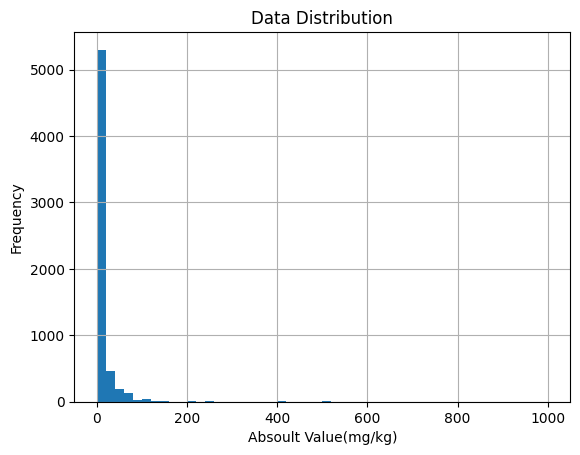

In [15]:
plt.figure(figsize=(8, 4))
data.hist(bins=50)
plt.title('Data Distribution')
plt.xlabel('Absoult Value(mg/kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

[   0.   20.   40.   60.   80.  100.  120.  140.  160.  180.  200.  220.
  240.  260.  280.  300.  320.  340.  360.  380.  400.  420.  440.  460.
  480.  500.  520.  540.  560.  580.  600.  620.  640.  660.  680.  700.
  720.  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.  940.
  960.  980. 1000.]


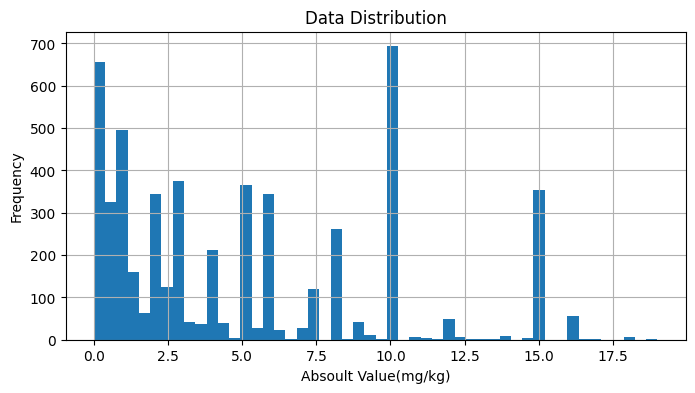

In [24]:
import numpy as np
hist, bin_edges = np.histogram(data, bins=50)
max_bin_index = np.argmax(hist)
max_bin_start = bin_edges[max_bin_index]
max_bin_end = bin_edges[max_bin_index + 1]
mode_bin_data = data[(data >= max_bin_start) & (data < max_bin_end)]
print(bin_edges)
plt.figure(figsize=(8, 4))
mode_bin_data.hist(bins=50)
plt.title('Data Distribution')
plt.xlabel('Absoult Value(mg/kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 800x400 with 0 Axes>

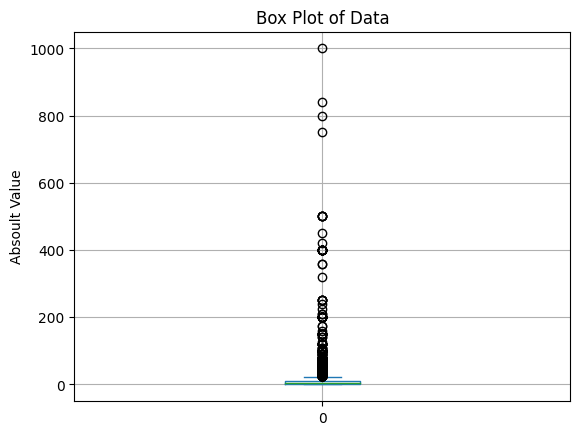

In [16]:
plt.figure(figsize=(8, 4))
data.plot(kind='box')
plt.title('Box Plot of Data')
plt.ylabel('Absoult Value')
plt.grid(True)
plt.show()

In [21]:
# 计算Q1和Q3及IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# 定义离群点的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 计算离群点的个数
outliers = data[(data < lower_bound) | (data > upper_bound)]
num_outliers = outliers.count()

print("Number of outliers:", num_outliers)
print("Outliers:", outliers.tolist())

# 检查离群点
outliers_nctid = absoult_dose['nctid'][(absoult_dose['dose'] < lower_bound) | (absoult_dose['dose'] > upper_bound)]
outliers_nctid = set(outliers_nctid.to_list())
for nctid in outliers_nctid:
    print(dose['dose_description'][nctid])

Number of outliers: 670
Outliers: [50.0, 40.0, 30.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 40.0, 40.0, 60.0, 60.0, 500.0, 750.0, 40.0, 100.0, 100.0, 45.0, 60.0, 60.0, 60.0, 60.0, 60.0, 50.0, 200.0, 24.0, 60.0, 28.0, 33.0, 175.0, 175.0, 90.0, 50.0, 50.0, 50.0, 50.0, 60.0, 75.0, 100.0, 50.0, 50.0, 25.0, 40.0, 60.0, 60.0, 30.0, 60.0, 120.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 500.0, 100.0, 500.0, 60.0, 120.0, 60.0, 120.0, 24.0, 100.0, 50.0, 60.0, 60.0, 24.0, 25.0, 29.0, 30.0, 34.0, 110.0, 110.0, 120.0, 60.0, 50.0, 50.0, 50.0, 50.0, 50.0, 80.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 30.0, 60.0, 30.0, 40.0, 80.0, 40.0, 35.0, 30.0, 40.0, 50.0, 60.0, 30.0, 60.0, 90.0, 40.78, 60.0, 100.0, 27.0, 240.0, 75.0, 30.0, 30.0, 30.0, 60.0, 50.0, 30.0, 50.0, 30.0, 40.0, 30.0, 30.0, 30.0, 60.0, 30.0, 50.0, 50.0, 50.0, 60.0, 40.0, 80.0, 40.0, 50.0, 30.0, 40.0, 40.0, 40.0, 40.0, 60.0, 160.0, 60.0, 40.0, 50.0, 40.0, 80.0, 40.0, 80.0, 100.0, 50.0, 28.0, 

差值分布

In [34]:
maxedge = 0
lis = []
for i in temp.dropna().index:
    if temp[i] == False:
        continue
    if len(temp[i]) == 1:
        lis.append((i, temp[i][0]))
        continue
    elif len(temp[i]) == 0:
        continue
    else:
        lis.append((i, max(temp[i])- min(temp[i])))
        if (max(temp[i])- min(temp[i])) > maxedge:
            maxedge = max(temp[i])- min(temp[i])
            print(maxedge, temp[i])
            print(dose.loc[i, 'dose_description'])

38.0 [50.0, 12.0, 40.0]
['D1-4 cyclophosphamide 50 mg/kg IV, then cyclosporine starting on d14 at 12 mg/kg/d for 6 months', 'ATG at 40 mg/kg/d for 4 days then cyclosporine at 12 mg /kg/d for 6 months']
250.0 [500.0, 750.0]
['Arginine Butyrate IV plus Standard local care dressing for a total of 12 weeks. Low dose 500 mg/kg or, increased dose 750 mg/kg. First week AB given 5 days in a row, over 6 to 12hours.', 'Patients are randomly assigned (following a table of random numbers prepared by a blinded statistician) between two arms of the study. Arm I is Standard local care dressing only, and Arm II is standard local care plus Arginine Butyrate (AB), the Investigational New Drug. Ulcers observed & traced weekly. Ulcer area calculated by computerized planimetry. After 12 weeks of therapy, if the ulcer size decreased by at least 25%, the AB may be continued for another 8 weeks (twice), or until the ulcer closes, plus an additional 2 weeks. The patients randomized to the Control Arm (standard

In [35]:
pd.DataFrame(lis, columns=['nctid', 'maxedge']).set_index('nctid').to_csv('drug-dose-prediction/output_maxedge.csv')

In [45]:
dose

,dose_description,phase
ntcid,,
NCT00000249,[Subject inhaled 20% N2O for 40 minutes with c...,Phase 2
NCT00000250,[Subjects will immerse forearm in lukewarm wat...,Phase 2
NCT00000251,"[Subjects inhale 30% N2O, Subjects inhale 0.2%...",Phase 2
NCT00000252,"[Subjects will inhale 0% N2O, Subjects will in...",Phase 2
NCT00000271,"[Participants were treated with desipramine, u...",Phase 2
...,...,...
NCT06263491,"[If participants show that they have no MRD, p...",Phase 2
NCT06263543,[SG will be administered on Days 1 and 8 of co...,Phase 2
NCT06263959,[Patiants on stable nucleos(t)ide analog (NA) ...,Phase 2


In [36]:
maxedge = pd.read_csv('drug-dose-prediction/output_maxedge.csv', index_col=0)
maxedge

,maxedge
nctid,
NCT00001626,38.0
NCT00001832,30.0
NCT00001962,1.0
NCT00001964,28.0
NCT00003838,0.0
...,...
NCT06251492,0.0
NCT06253650,6.4
NCT06255977,0.9


In [37]:
maxedge['maxedge'].describe()

count    2664.000000
mean       12.101052
std        34.622193
min         0.000000
25%         0.900000
50%         3.857500
75%        10.000000
max       832.000000
Name: maxedge, dtype: float64

In [29]:
data = maxedge['maxedge']

In [31]:
# 计算Q1和Q3及IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# 定义离群点的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 计算离群点的个数
outliers = data[(data < lower_bound) | (data > upper_bound)]
num_outliers = outliers.count()

print("Number of outliers:", num_outliers)
print("Outliers:", outliers.tolist())

# 检查离群点
outliers_nctid = maxedge[(maxedge['maxedge'] < lower_bound) | (maxedge['maxedge'] > upper_bound)].index
for nctid in set(list(outliers_nctid)):
    print(dose['dose_description'][nctid])

Number of outliers: 267
Outliers: [38.0, 30.0, 28.0, 250.0, 39.0, 59.0, 40.0, 184.0, 60.0, 32.975, 155.0, 85.0, 30.0, 50.0, 60.0, 96.0, 50.0, 25.0, 40.0, 90.0, 50.0, 400.0, 60.0, 90.0, 50.0, 112.5, 60.0, 50.0, 80.0, 60.0, 27.0, 60.0, 70.0, 35.0, 40.0, 30.0, 40.31, 40.0, 240.0, 60.0, 29.0, 48.0, 40.0, 30.0, 49.2, 50.0, 60.0, 60.0, 40.0, 30.0, 48.0, 150.0, 60.0, 45.0, 70.0, 40.0, 100.0, 50.0, 27.97, 59.2, 90.0, 60.0, 195.0, 25.0, 50.0, 60.0, 30.0, 45.0, 35.0, 55.0, 59.4, 66.0, 50.0, 40.0, 60.0, 100.0, 100.0, 45.0, 91.7, 60.0, 100.0, 49.985, 69.933, 97.0, 60.0, 30.0, 40.0, 58.0, 25.0, 49.7, 25.0, 36.0, 30.0, 175.0, 30.0, 25.0, 200.0, 49.985, 33.0, 30.0, 25.0, 32.0, 125.0, 37.5, 60.0, 30.0, 49.97, 116.8, 30.0, 63.0, 150.0, 320.0, 30.0, 49.985, 39.25, 70.0, 39.9, 100.0, 50.0, 30.0, 30.0, 225.0, 50.0, 49.97, 24.0, 24.0, 30.0, 110.0, 250.0, 30.0, 100.0, 29.55, 64.0, 133.0, 40.0, 41.0, 30.0, 30.0, 28.0, 44.75, 60.0, 40.0, 100.0, 30.0, 95.5, 40.0, 25.0, 30.0, 28.0, 49.97, 90.0, 29.0, 40.0, 24.0

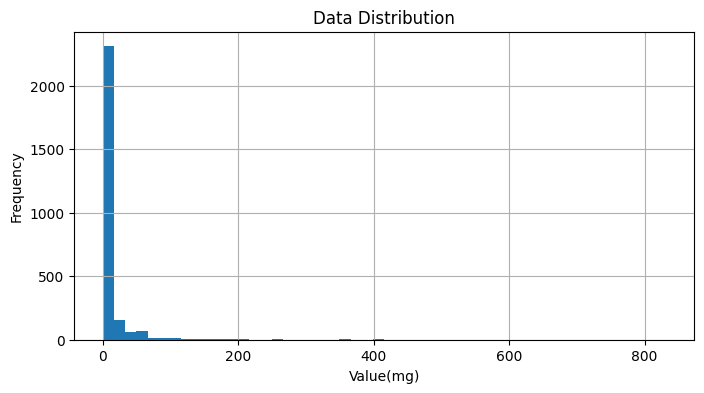

In [38]:
plt.figure(figsize=(8, 4))
maxedge['maxedge'].hist(bins=50)
plt.title('Data Distribution')
plt.xlabel('Value(mg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

[  0.    16.64  33.28  49.92  66.56  83.2   99.84 116.48 133.12 149.76
 166.4  183.04 199.68 216.32 232.96 249.6  266.24 282.88 299.52 316.16
 332.8  349.44 366.08 382.72 399.36 416.   432.64 449.28 465.92 482.56
 499.2  515.84 532.48 549.12 565.76 582.4  599.04 615.68 632.32 648.96
 665.6  682.24 698.88 715.52 732.16 748.8  765.44 782.08 798.72 815.36
 832.  ]


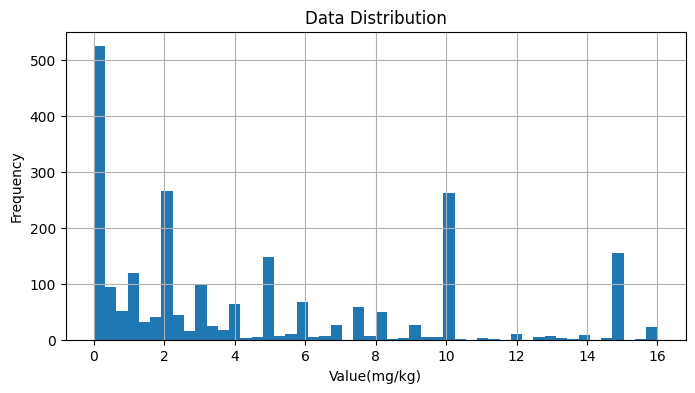

In [33]:
hist, bin_edges = np.histogram(data, bins=50)
max_bin_index = np.argmax(hist)
max_bin_start = bin_edges[max_bin_index]
max_bin_end = bin_edges[max_bin_index + 1]
mode_bin_data = data[(data >= max_bin_start) & (data < max_bin_end)]
print(bin_edges)
plt.figure(figsize=(8, 4))
mode_bin_data.hist(bins=50)
plt.title('Data Distribution')
plt.xlabel('Value(mg/kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

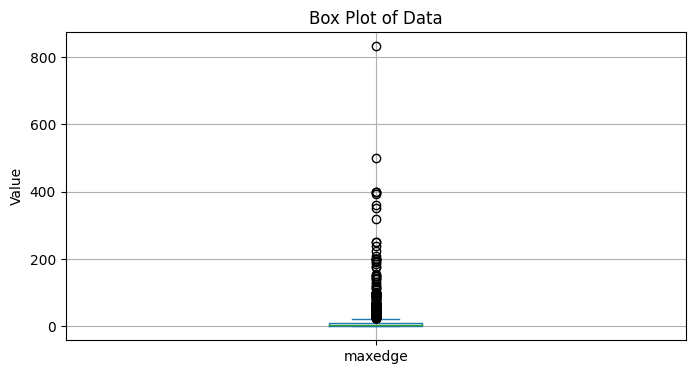

In [40]:
plt.figure(figsize=(8, 4))
maxedge['maxedge'].plot(kind='box')
plt.title('Box Plot of Data')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
import pickle
def drug_hit_smiles(drug, drug2smiles):
	"""
		heuristics
	"""
	if drug in drug2smiles:
		return drug2smiles[drug]
	for word in drug.split():
		if len(word)>=7 and word in drug2smiles:
			print("drug hit: ", drug, '&', word)
			return drug2smiles[word]
	return None 	

def xml2smiles(xml_file):
	tree = ET.parse(xml_file)
	root = tree.getroot()
	pkl_file = "../data/drug2smiles.pkl"
	drug2smiles = pickle.load(open(pkl_file, 'rb'))

	interventions = [i for i in root.findall('intervention')]
	drugs = [i.find('intervention_name').text.lower() for i in interventions \
														if i.find('intervention_type').text=='Drug']
	smiles_lst = []
	for drug in drugs:
		smiles = drug_hit_smiles(drug, drug2smiles)
		if smiles is not None: 
					# drug_hit += 1
			smiles_lst.append(smiles)
		else:
			print("unfounded drug: ", drug)
	return smiles_lst

In [ ]:
smile_list = []

with open("../../data/all_xml", "r") as file:
    for xml_path in tqdm(file):
        xml_path = f"../../{xml_path.strip()}"
        
        # NCT00000150 <- raw_data/NCT0000xxxx/NCT00000150.xml
        nct_id = re.search(r"/([^/]+)\.xml$", xml_path).group(1)
        
        smile = xmlfile2text(xml_path)

        smile_list.append((nct_id, smile))

smile_df = pd.DataFrame(smile_list, columns=['ntcid', 'smile'])
smile_df = smile_df.set_index('ntcid')